## Exercise 0:

## 0. Car sales in Norway - emissions and trends

### From lecture 02 with car sales in Norway, we worked with one dataset, however there were some more that you downloaded from kaggle. In this exercise, work with this dataset norway_new_car_sales_by_month.csv



## a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [180]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [182]:
# visar kolumnnamn

df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [183]:
# visar rader och kolumner (121 rader och 17 kolumner)

df.shape

(121, 17)

In [184]:
# grundläggande statistik

df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


## b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

In [185]:
import duckdb

df_quantity_year = duckdb.query(
    """--sql
    SELECT Year, 
    SUM(quantity) AS Total_Quantity 
    FROM df
    GROUP BY Year
    ORDER BY Year
"""
).df()

print(df_quantity_year)

    Year  Total_Quantity
0   2007        129195.0
1   2008        110617.0
2   2009         98675.0
3   2010        127754.0
4   2011        138345.0
5   2012        137967.0
6   2013        142151.0
7   2014        144202.0
8   2015        150686.0
9   2016        154603.0
10  2017         13055.0


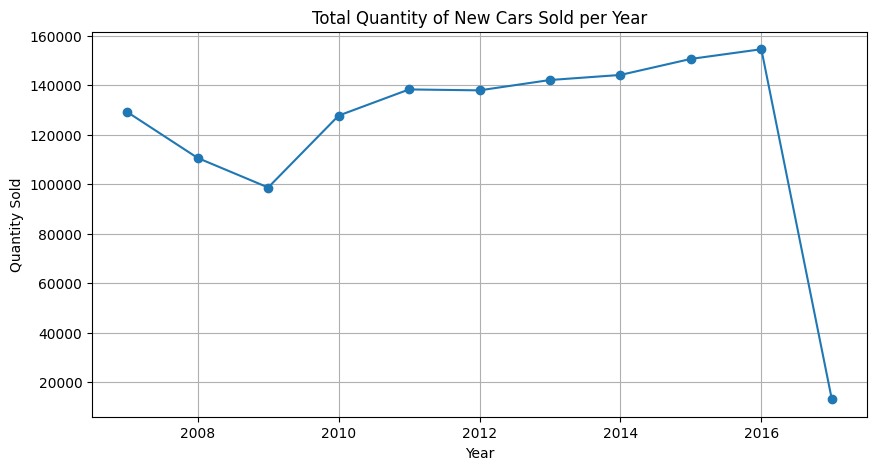

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_quantity_year["Year"], df_quantity_year["Total_Quantity"], marker="o")
plt.title("Total Quantity of New Cars Sold per Year")
plt.xlabel("Year")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()

### We should skip the year 2017 since we don't have data for the whole year:

In [187]:
import duckdb

df_quantity_year = duckdb.query(
    """--sql
    SELECT Year, 
    SUM(quantity) AS Total_Quantity 
    FROM df
    WHERE Year < 2017
    GROUP BY Year
    ORDER BY Year
"""
).df()

print(df_quantity_year)

   Year  Total_Quantity
0  2007        129195.0
1  2008        110617.0
2  2009         98675.0
3  2010        127754.0
4  2011        138345.0
5  2012        137967.0
6  2013        142151.0
7  2014        144202.0
8  2015        150686.0
9  2016        154603.0


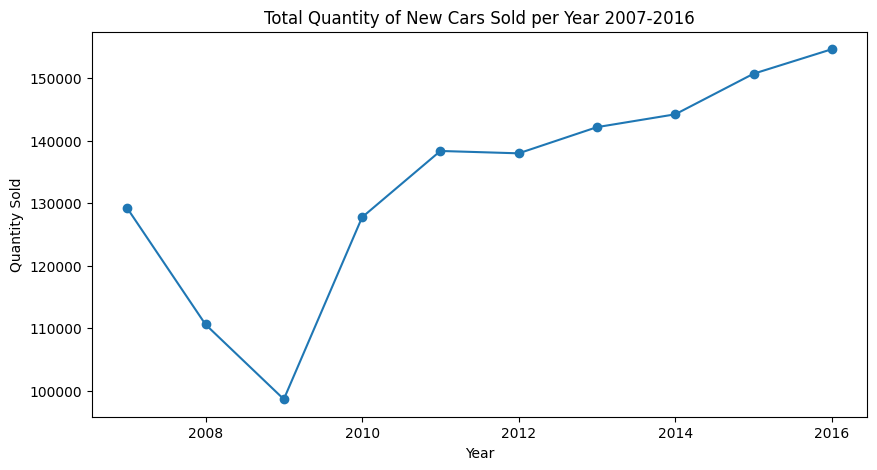

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_quantity_year["Year"], df_quantity_year["Total_Quantity"], marker="o")
plt.title("Total Quantity of New Cars Sold per Year 2007-2016")
plt.xlabel("Year")
plt.ylabel("Quantity Sold")
plt.grid(False)
plt.show()

## c) Draw a line chart of average CO2 emissions for same years that as in b).

In [189]:
import duckdb

df_co2_year = duckdb.query(
    """--sql
    SELECT Year,
    AVG(Avg_CO2) AS Average_CO2_Year
    FROM df
    WHERE Year < 2017
    GROUP BY Year
    ORDER BY Year
    """
).df()

print(df_co2_year)

   Year  Average_CO2_Year
0  2007        159.000000
1  2008        158.000000
2  2009        150.916667
3  2010        140.666667
4  2011        134.000000
5  2012        129.916667
6  2013        123.000000
7  2014        110.416667
8  2015         99.750000
9  2016         93.333333


<function matplotlib.pyplot.show(close=None, block=None)>

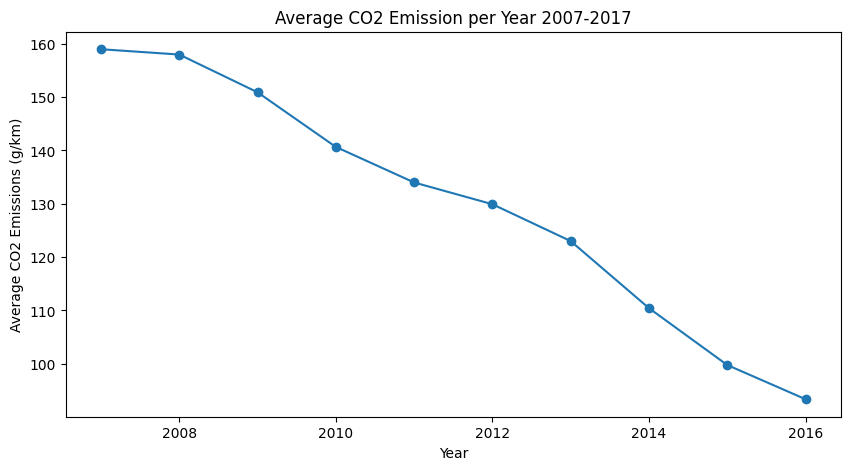

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_co2_year["Year"], df_co2_year["Average_CO2_Year"], marker="o")
plt.title("Average CO2 Emission per Year 2007-2017")
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.grid(False)
plt.show

## d) Draw a line chart of all years and months for import.

In [191]:
df_import = duckdb.query(
    """--sql
    SELECT 
        make_date(Year, Month, 1) AS Date,
        Import
    FROM df
    ORDER BY Date
    """
).df()

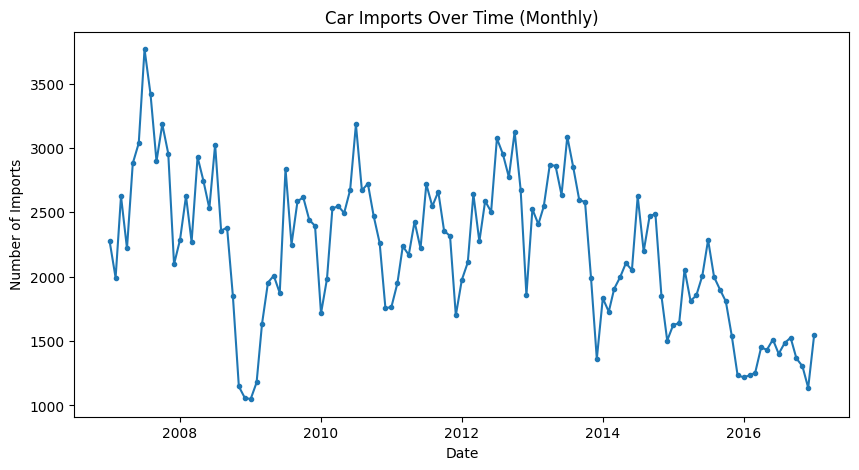

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_import["Date"], df_import["Import"], marker="o", markersize=3)
plt.title("Car Imports Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Imports")
plt.grid(False)
plt.show()

## e) Draw a line chart of all years and months for average CO2 emissions.

In [193]:
import duckdb

df_co2_monthly = duckdb.query(
    """--sql
    SELECT 
        make_date(Year, Month, 1) AS Date,
        Avg_CO2
    FROM df
    ORDER BY Date
    """
).df()

print(df_co2_monthly)

          Date  Avg_CO2
0   2007-01-01      152
1   2007-02-01      156
2   2007-03-01      159
3   2007-04-01      160
4   2007-05-01      160
..         ...      ...
116 2016-09-01       88
117 2016-10-01       91
118 2016-11-01       88
119 2016-12-01       98
120 2017-01-01       84

[121 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

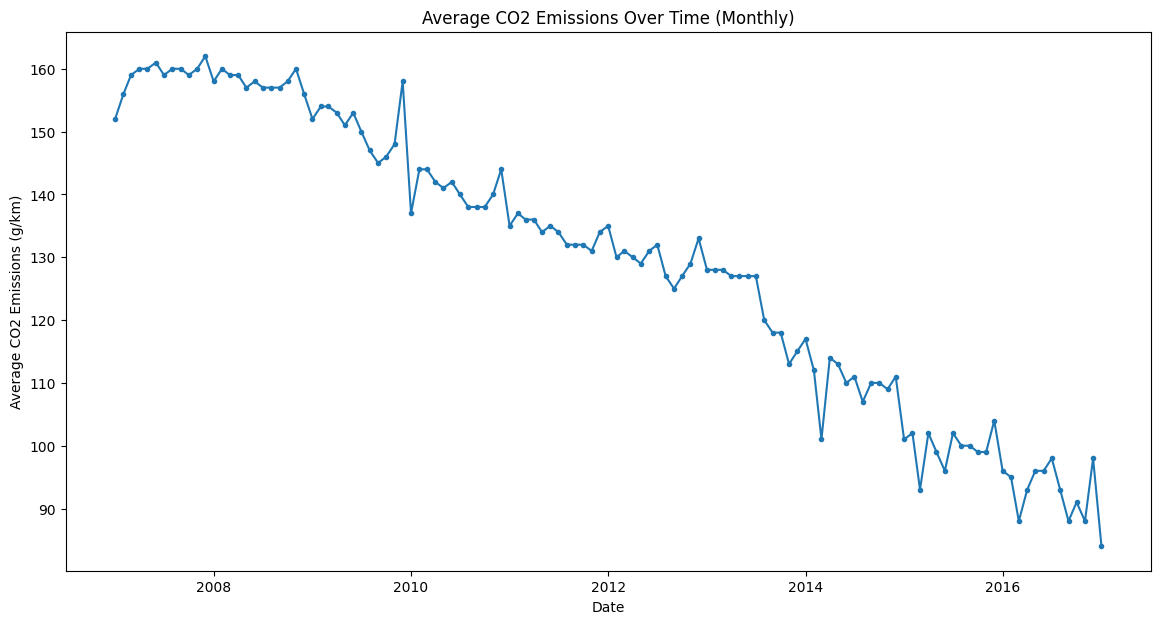

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_co2_monthly["Date"], df_co2_monthly["Avg_CO2"], marker="o", markersize=3)
plt.title("Average CO2 Emissions Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.grid(False)
plt.show

## f) Draw a line chart of all years and months for electric cars import.

In [195]:
import duckdb

df_import_electric = duckdb.query(
    """--sql
    SELECT 
        make_date(Year, Month, 1) AS Date,
        Import_Electric
    FROM 
        df
    ORDER BY 
        Date
    """
).df()

# Ersätter NaN värden med 0:
df_import_electric["Import_Electric"] = df_import_electric["Import_Electric"].fillna(0)

print(df_import_electric)

          Date  Import_Electric
0   2007-01-01              0.0
1   2007-02-01              0.0
2   2007-03-01              0.0
3   2007-04-01              0.0
4   2007-05-01              0.0
..         ...              ...
116 2016-09-01            517.0
117 2016-10-01            486.0
118 2016-11-01            502.0
119 2016-12-01            361.0
120 2017-01-01            494.0

[121 rows x 2 columns]


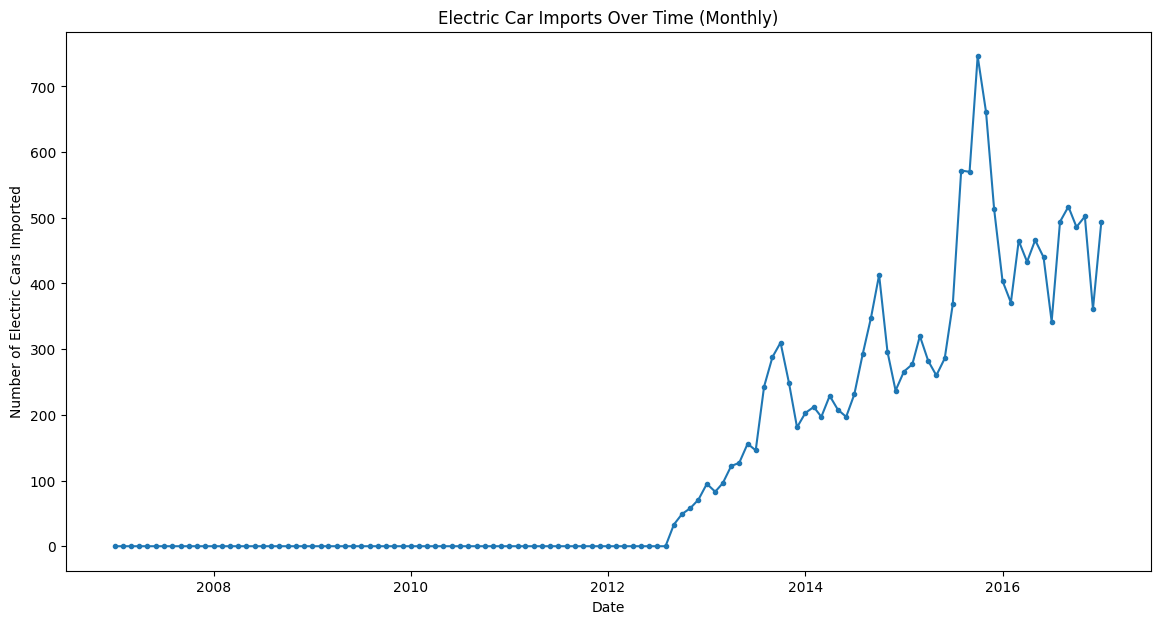

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_import_electric["Date"], df_import_electric["Import_Electric"], marker="o", markersize=3)
plt.title("Electric Car Imports Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Electric Cars Imported")
plt.grid(False)
plt.show()

## g) Draw a line chart of average diesel share per year.

In [197]:
import duckdb

df_diesel_share = duckdb.query(
    """--sql
    SELECT
        Year,
        AVG(Diesel_Share) AS Average_Diesel_Share
    FROM
        df
    WHERE
        Year < 2017
    GROUP BY
        Year
    ORDER BY
        Year
    """
).df()

print(df_diesel_share)

   Year  Average_Diesel_Share
0  2007             74.216667
1  2008             72.300000
2  2009             72.241667
3  2010             74.875000
4  2011             75.550000
5  2012             64.391667
6  2013             52.933333
7  2014             48.783333
8  2015             40.991667
9  2016             31.691667


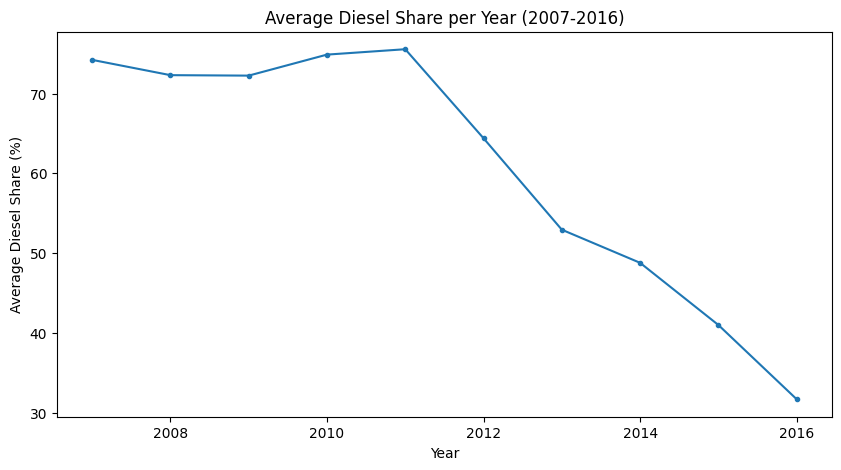

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_diesel_share["Year"], df_diesel_share["Average_Diesel_Share"], marker="o", markersize=3)
plt.title("Average Diesel Share per Year (2007-2016)")
plt.xlabel("Year")
plt.ylabel("Average Diesel Share (%)")
plt.grid(False)
plt.show()

## h) Discuss some findings with a friend based on this dataset, and do plot more graphs.

Baserat på detta dataset för nya bilförsäljningar i Norge kan flera intressanta trender observeras.

För det första har de genomsnittliga CO2-utsläppen per bil minskat stadigt från 2007 till 2017, vilket tyder på en övergång till mer miljövänliga fordon samt förbättrad fordonsteknik.

När det gäller import av elbilar syns en tydlig ökning runt 2012, vilket speglar Norges satsning på elektriska fordon samt statlica incitament för renare transporter.

Dessutom hade dieselbilar initialt en väldigt hög marknadsandel, över 70% innan 2011. Från och med 2011 ser vi dock en tydlig och kontinuerlig nedgång i dieselbilarnas andel, troligen på grund av ökad miljöhänsyn, fler hybrid- och elbilsmöjligheter samt förändrade regleringar.

Sammanfattningsvis speglar datan stora förändringar i den norska bilmarknaden mot renare energi och fordon med mindre utsläpp.

## Bonus:

In [199]:
import duckdb

df_diesel_hybrid_electric = duckdb.query(
    """--sql
    SELECT
        make_date(Year, Month, 1) AS Date,
        Quantity_Diesel,
        Quantity_Hybrid,
        Quantity_Electric
    FROM
        df
    ORDER BY
        Date
    """
).df()

df_diesel_hybrid_electric['Quantity_Hybrid'] = df_diesel_hybrid_electric['Quantity_Hybrid'].fillna(0)
df_diesel_hybrid_electric['Quantity_Electric'] = df_diesel_hybrid_electric['Quantity_Electric'].fillna(0)

print(df_diesel_hybrid_electric)

          Date  Quantity_Diesel  Quantity_Hybrid  Quantity_Electric
0   2007-01-01            10072              0.0                0.0
1   2007-02-01             7222              0.0                0.0
2   2007-03-01             7965              0.0                0.0
3   2007-04-01             6116              0.0                0.0
4   2007-05-01             8519              0.0                0.0
..         ...              ...              ...                ...
116 2016-09-01             3838           3991.0             2629.0
117 2016-10-01             3544           3209.0             1861.0
118 2016-11-01             3892           3181.0             2567.0
119 2016-12-01             4829           2597.0             2319.0
120 2017-01-01             3433           4419.0             2295.0

[121 rows x 4 columns]


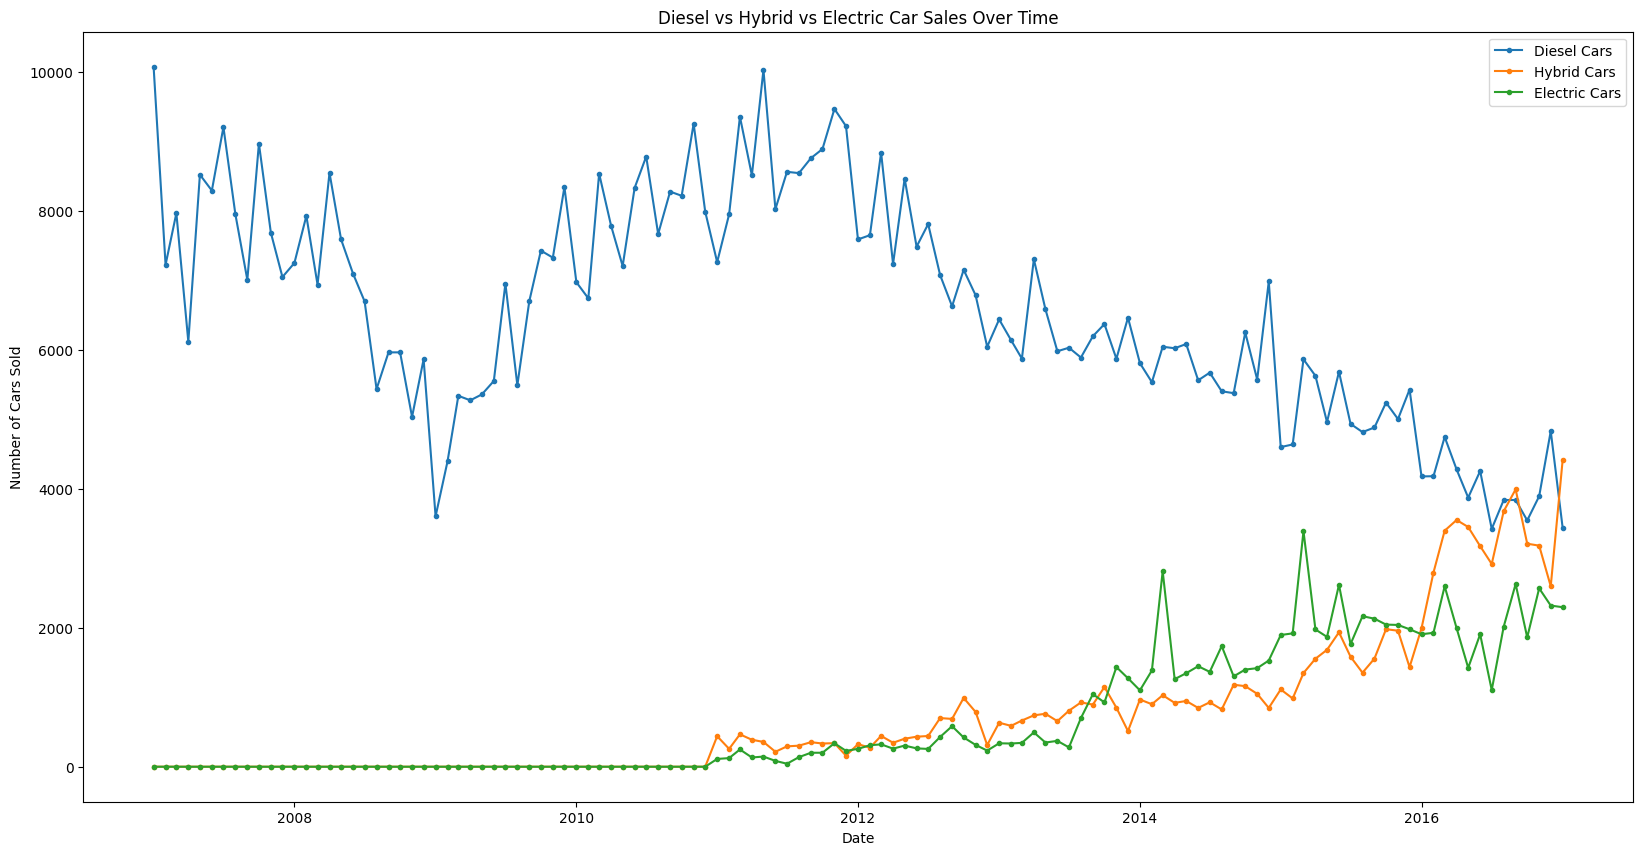

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.plot(df_diesel_hybrid_electric["Date"], df_diesel_hybrid_electric["Quantity_Diesel"], label="Diesel Cars", marker="o", markersize=3)
plt.plot(df_diesel_hybrid_electric["Date"], df_diesel_hybrid_electric["Quantity_Hybrid"], label="Hybrid Cars", marker="o", markersize=3)
plt.plot(df_diesel_hybrid_electric["Date"], df_diesel_hybrid_electric["Quantity_Electric"], label="Electric Cars", marker="o", markersize=3)

plt.title("Diesel vs Hybrid vs Electric Car Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cars Sold")
plt.legend()
plt.grid(False)
plt.show()